In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import networkx as nx

In [54]:
traffic_dataset = pd.read_csv('TrafficTwoMonth.csv')

In [55]:
traffic_dataset.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [56]:
traffic_dataset['midday'] = ''
for i in range(len(traffic_dataset['Time'])):
  if traffic_dataset['Time'][i][-2:].endswith('AM'):
    traffic_dataset.loc[i, 'midday'] = 'AM'
  elif traffic_dataset['Time'][i][-2:].endswith('PM'):
    traffic_dataset.loc[i, 'midday'] = 'PM'

traffic_dataset['Time'] = traffic_dataset['Time'].str[:-2]
    

In [57]:
traffic_dataset

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,12:00:00,10,Tuesday,13,2,2,24,41,normal,AM
1,12:15:00,10,Tuesday,14,1,1,36,52,normal,AM
2,12:30:00,10,Tuesday,10,2,2,32,46,normal,AM
3,12:45:00,10,Tuesday,10,2,2,36,50,normal,AM
4,1:00:00,10,Tuesday,11,2,1,34,48,normal,AM
...,...,...,...,...,...,...,...,...,...,...
5947,10:45:00,9,Thursday,16,3,1,36,56,normal,PM
5948,11:00:00,9,Thursday,11,0,1,30,42,normal,PM
5949,11:15:00,9,Thursday,15,4,1,25,45,normal,PM
5950,11:30:00,9,Thursday,16,5,0,27,48,normal,PM


In [58]:
traffic_dataset['Time'] = pd.to_datetime(traffic_dataset['Time']).dt.hour * 3600 + \
    pd.to_datetime(traffic_dataset['Time']).dt.minute * 60 + \
    pd.to_datetime(traffic_dataset['Time']).dt.second

C:\Users\User\AppData\Local\Temp\ipykernel_6660\2707208563.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traffic_dataset['Time'] = pd.to_datetime(traffic_dataset['Time']).dt.hour * 3600 + \
C:\Users\User\AppData\Local\Temp\ipykernel_6660\2707208563.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(traffic_dataset['Time']).dt.minute * 60 + \
C:\Users\User\AppData\Local\Temp\ipykernel_6660\2707208563.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(traffic_dataset['Time']).dt.second


In [59]:
feature_except_target = traffic_dataset.drop(['Traffic Situation'], axis=1)
target_feature = traffic_dataset['Traffic Situation']
target_encoder = LabelEncoder()
target_feature = target_encoder.fit_transform(target_feature)
encoded_data = pd.concat([feature_except_target,  pd.Series(target_feature, name='Traffic Situation')], axis=1)

encoded_data


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday,Traffic Situation
0,43200,10,Tuesday,13,2,2,24,41,AM,3
1,44100,10,Tuesday,14,1,1,36,52,AM,3
2,45000,10,Tuesday,10,2,2,32,46,AM,3
3,45900,10,Tuesday,10,2,2,36,50,AM,3
4,3600,10,Tuesday,11,2,1,34,48,AM,3
...,...,...,...,...,...,...,...,...,...,...
5947,38700,9,Thursday,16,3,1,36,56,PM,3
5948,39600,9,Thursday,11,0,1,30,42,PM,3
5949,40500,9,Thursday,15,4,1,25,45,PM,3
5950,41400,9,Thursday,16,5,0,27,48,PM,3


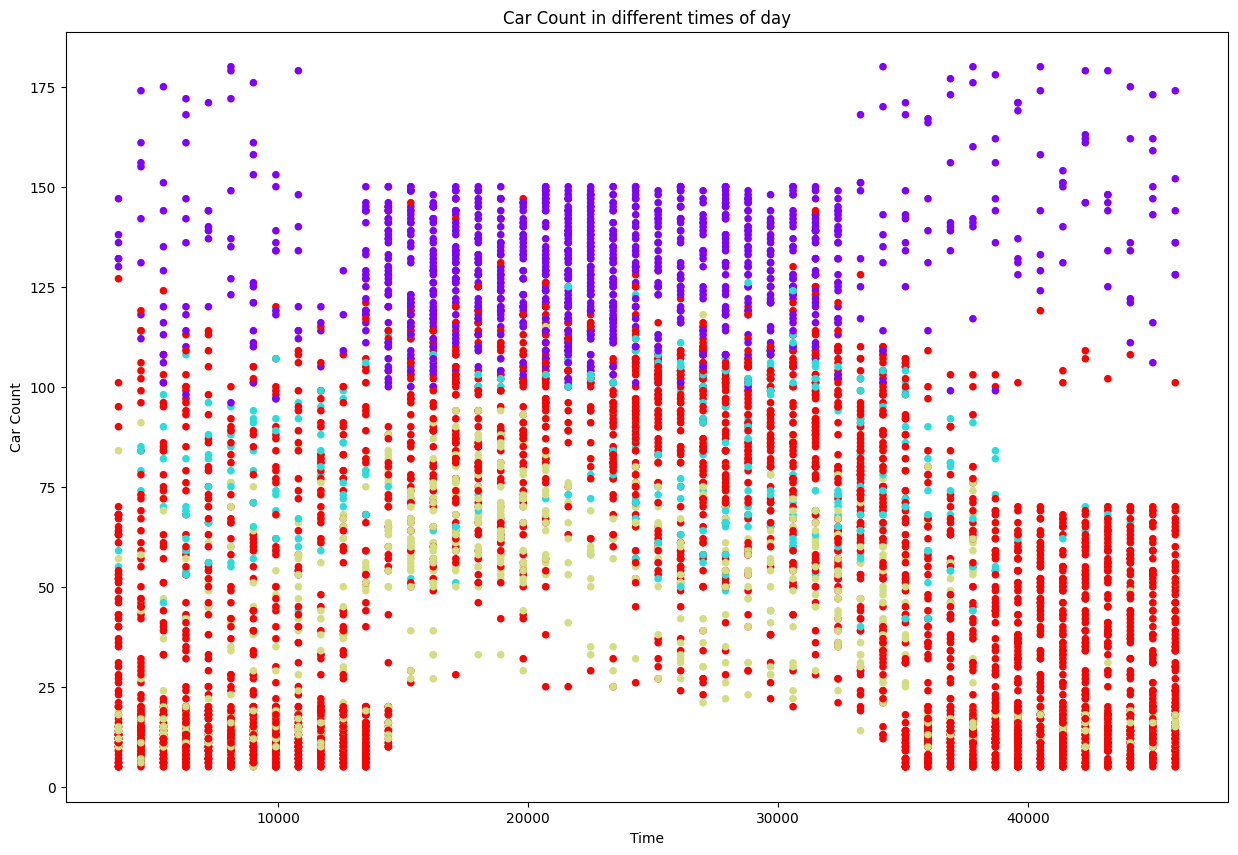

In [122]:
plt.figure(figsize=(15,10))
plt.scatter(encoded_data.iloc[:, 0], encoded_data.iloc[:, 3], c=encoded_data.iloc[:, 9], cmap='rainbow', s=20, label='Car Count')
plt.title('Car Count in different times of day')
plt.xlabel('Time')
plt.ylabel('Car Count')
plt.show()


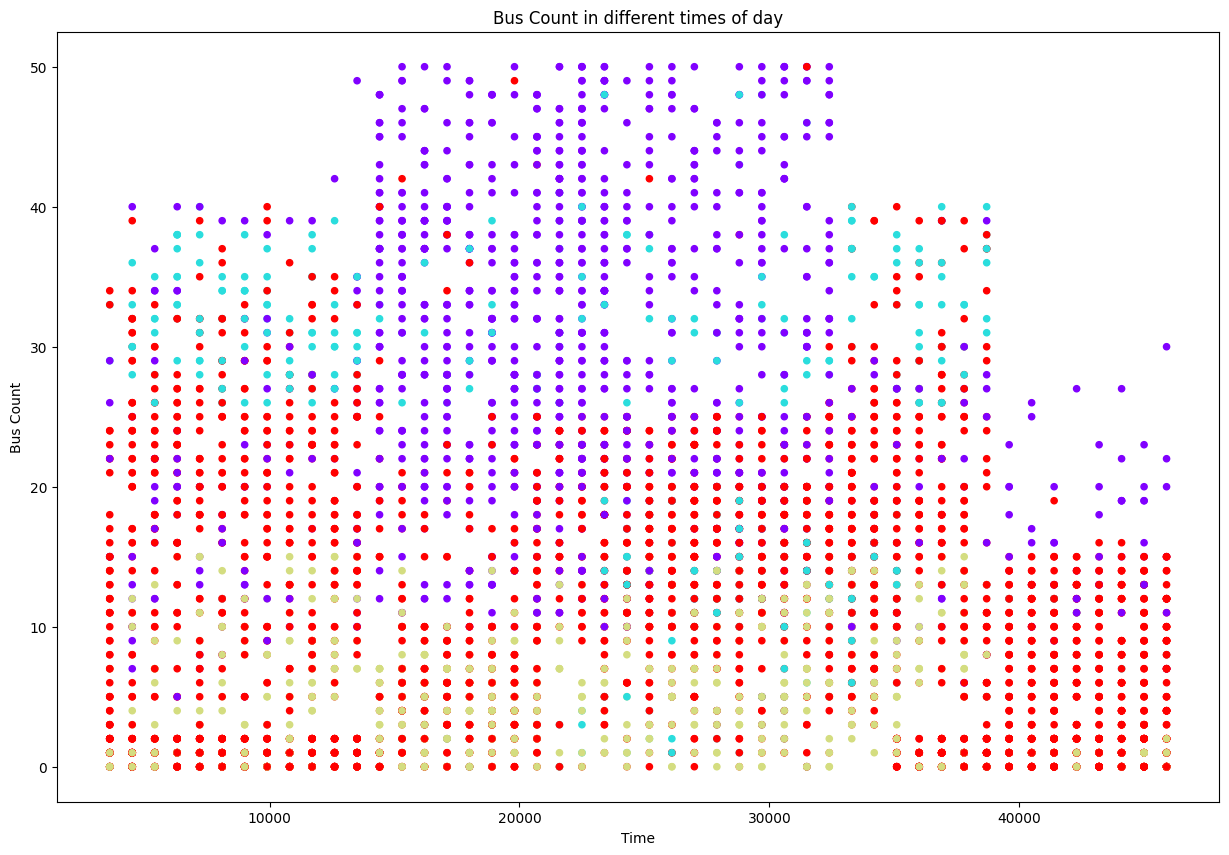

In [71]:
plt.figure(figsize=(15,10))
plt.scatter(encoded_data.iloc[:, 0], encoded_data.iloc[:, 5], c=encoded_data.iloc[:, 9], cmap='rainbow', s=20)
plt.title('Bus Count in different times of day')
plt.xlabel('Time')
plt.ylabel('Bus Count')
plt.show()

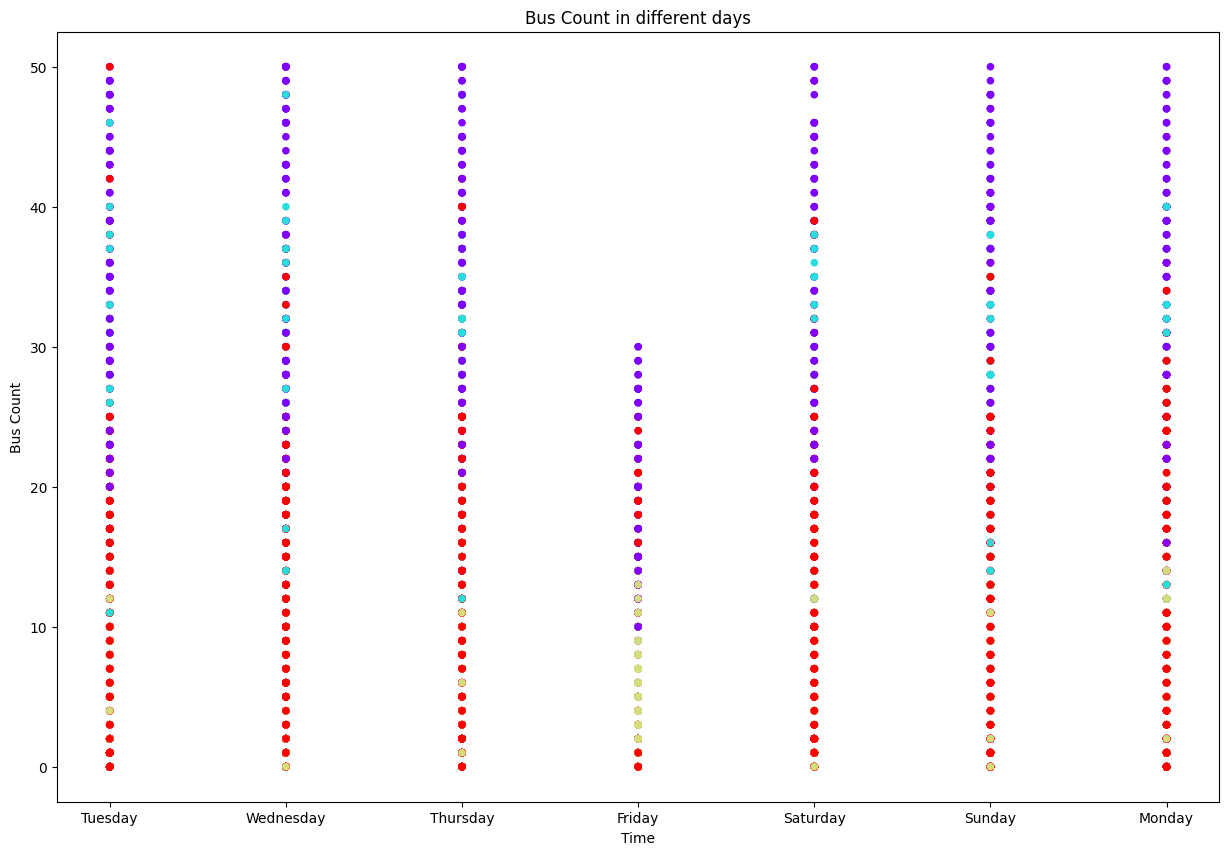

In [123]:
plt.figure(figsize=(15,10))
plt.scatter(encoded_data.iloc[:, 2], encoded_data.iloc[:, 5], c=encoded_data.iloc[:, 9], cmap='rainbow', s=20)
plt.title('Bus Count in different days')
plt.xlabel('Time')
plt.ylabel('Bus Count')
plt.show()

In [63]:
label_encoder = LabelEncoder()
feature_except_target['midday'] = label_encoder.fit_transform(feature_except_target['midday'])
feature_except_target['Day of the week'] = label_encoder.fit_transform(feature_except_target['Day of the week'])

numeric_features = ['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'midday']
normalization_scaler = StandardScaler()
feature_except_target[numeric_features] = normalization_scaler.fit_transform(feature_except_target[numeric_features])


encoded_data_normalized = pd.concat([feature_except_target,  pd.Series(target_feature, name='Traffic Situation')], axis=1)

encoded_data_normalized



,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday,Traffic Situation
0,1.479781,-0.670820,0.900187,-1.171975,-0.880773,-0.873269,0.487929,-1.217351,-1.0,3
1,1.551966,-0.670820,0.900187,-1.149626,-0.967451,-0.953290,1.581600,-1.020893,-1.0,3
2,1.624150,-0.670820,0.900187,-1.239021,-0.880773,-0.873269,1.217043,-1.128052,-1.0,3
3,1.696335,-0.670820,0.900187,-1.239021,-0.880773,-0.873269,1.581600,-1.056613,-1.0,3
4,-1.696335,-0.670820,0.900187,-1.216672,-0.880773,-0.953290,1.399322,-1.092333,-1.0,3
...,...,...,...,...,...,...,...,...,...,...
5947,1.118859,-0.782624,0.401869,-1.104929,-0.794095,-0.953290,1.581600,-0.949454,1.0,3
5948,1.191043,-0.782624,0.401869,-1.216672,-1.054129,-0.953290,1.034765,-1.199492,1.0,3
5949,1.263228,-0.782624,0.401869,-1.127278,-0.707418,-0.953290,0.579068,-1.145912,1.0,3
5950,1.335412,-0.782624,0.401869,-1.104929,-0.620740,-1.033312,0.761347,-1.092333,1.0,3


In [64]:
traffic_data = encoded_data_normalized.iloc[:, 0:9]
traffic_target = encoded_data_normalized.iloc[:, 9]

traffic_data

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday
0,1.479781,-0.670820,0.900187,-1.171975,-0.880773,-0.873269,0.487929,-1.217351,-1.0
1,1.551966,-0.670820,0.900187,-1.149626,-0.967451,-0.953290,1.581600,-1.020893,-1.0
2,1.624150,-0.670820,0.900187,-1.239021,-0.880773,-0.873269,1.217043,-1.128052,-1.0
3,1.696335,-0.670820,0.900187,-1.239021,-0.880773,-0.873269,1.581600,-1.056613,-1.0
4,-1.696335,-0.670820,0.900187,-1.216672,-0.880773,-0.953290,1.399322,-1.092333,-1.0
...,...,...,...,...,...,...,...,...,...
5947,1.118859,-0.782624,0.401869,-1.104929,-0.794095,-0.953290,1.581600,-0.949454,1.0
5948,1.191043,-0.782624,0.401869,-1.216672,-1.054129,-0.953290,1.034765,-1.199492,1.0
5949,1.263228,-0.782624,0.401869,-1.127278,-0.707418,-0.953290,0.579068,-1.145912,1.0
5950,1.335412,-0.782624,0.401869,-1.104929,-0.620740,-1.033312,0.761347,-1.092333,1.0


### **Model using relu, softmax, adam**

In [107]:
for ratio in [0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(traffic_data, traffic_target, test_size=1-ratio, random_state=42)

  encoder = OneHotEncoder()
  y_train_encoder = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray() #it doesn't work if i remove toarray()
  y_test_encoder = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

  model = Sequential()
  model.add(Dense(16, input_dim=9, activation='relu'))
  model.add(Dense(4, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # print(model.summary())

  model.fit(X_train, y_train_encoder, epochs=50, batch_size=8, verbose=0)

  _, accuracy_score = model.evaluate(X_test, y_test_encoder, verbose=0)
  print(f'For ratio {ratio} accuracy score is: {accuracy_score}')

For ratio 0.7 accuracy score is: 0.9630458950996399
For ratio 0.8 accuracy score is: 0.963895857334137
For ratio 0.9 accuracy score is: 0.9697986841201782


### **Using tanh, sigmoid and rmsprop as optimizer**

In [111]:
for ratio in [0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(traffic_data, traffic_target, test_size=1-ratio, random_state=42)

  encoder = OneHotEncoder()
  y_train_encoder = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray() #it doesn't work if i remove toarray()
  y_test_encoder = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

  model1 = Sequential()
  model1.add(Dense(16, input_dim=9, activation='tanh'))
  model1.add(Dense(4, activation='sigmoid'))
  model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  

  model1.fit(X_train, y_train_encoder, epochs=50, batch_size=12, verbose=0)

  _, accuracy_score1 = model1.evaluate(X_test, y_test_encoder, verbose=0)
  print(f'For ratio {ratio} accuracy score is: {accuracy_score1}')
print(model1.summary())


For ratio 0.7 accuracy score is: 0.9619261026382446
For ratio 0.8 accuracy score is: 0.9680940508842468
For ratio 0.9 accuracy score is: 0.968120813369751
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                160       
                                                                 
 dense_37 (Dense)            (None, 4)                 68        
                                                                 
Total params: 228 (912.00 Byte)
Trainable params: 228 (912.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### **Using tanh, softmax, adam**

In [112]:
for ratio in [0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(traffic_data, traffic_target, test_size=1-ratio, random_state=42)

  encoder = OneHotEncoder()
  y_train_encoder = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray() #it doesn't work if i remove toarray()
  y_test_encoder = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

  model2 = Sequential()
  model2.add(Dense(16, input_dim=9, activation='tanh'))
  model2.add(Dense(4, activation='softmax'))
  model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  

  model2.fit(X_train, y_train_encoder, epochs=50, batch_size=20, verbose=0)
  _, accuracy_score2 = model2.evaluate(X_test, y_test_encoder, verbose=0)
  print(accuracy_score2)
print(model1.summary())

0.957446813583374
0.9630562663078308
0.9714764952659607
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                160       
                                                                 
 dense_37 (Dense)            (None, 4)                 68        
                                                                 
Total params: 228 (912.00 Byte)
Trainable params: 228 (912.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### **Using relu, sigmoid, rmsprop**

In [113]:
for ratio in [0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(traffic_data, traffic_target, test_size=1-ratio, random_state=42)

  encoder = OneHotEncoder()
  y_train_encoder = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray() #it doesn't work if i remove toarray()
  y_test_encoder = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

  model3 = Sequential()
  model3.add(Dense(32, input_dim=9, activation='relu'))
  model3.add(Dense(4, activation='sigmoid'))
  model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  

  model3.fit(X_train, y_train_encoder, epochs=50, batch_size=25, verbose=0) 
  _, accuracy_score3 = model3.evaluate(X_test, y_test_encoder, verbose=0)
  print(accuracy_score3)
print(model1.summary())

0.956886887550354
0.963895857334137
0.9697986841201782
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                160       
                                                                 
 dense_37 (Dense)            (None, 4)                 68        
                                                                 
Total params: 228 (912.00 Byte)
Trainable params: 228 (912.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### **Model using relu, softmax, adam with larger number of hidden node but smaller batch size**

In [114]:
for ratio in [0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(traffic_data, traffic_target, test_size=1-ratio, random_state=42)

  encoder = OneHotEncoder()
  y_train_encoder = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray() #it doesn't work if i remove toarray()
  y_test_encoder = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

  model4 = Sequential()
  model4.add(Dense(32, input_dim=9, activation='relu'))
  model4.add(Dense(4, activation='softmax'))
  model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # print(model.summary())

  model4.fit(X_train, y_train_encoder, epochs=50, batch_size=8, verbose=0)

  _, accuracy_score = model4.evaluate(X_test, y_test_encoder, verbose=0)
  print(f'For ratio {ratio} accuracy score is: {accuracy_score}')

For ratio 0.7 accuracy score is: 0.9664053916931152
For ratio 0.8 accuracy score is: 0.976490318775177
For ratio 0.9 accuracy score is: 0.9815436005592346


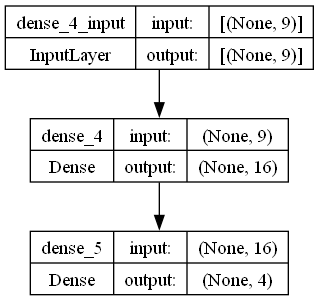

In [74]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

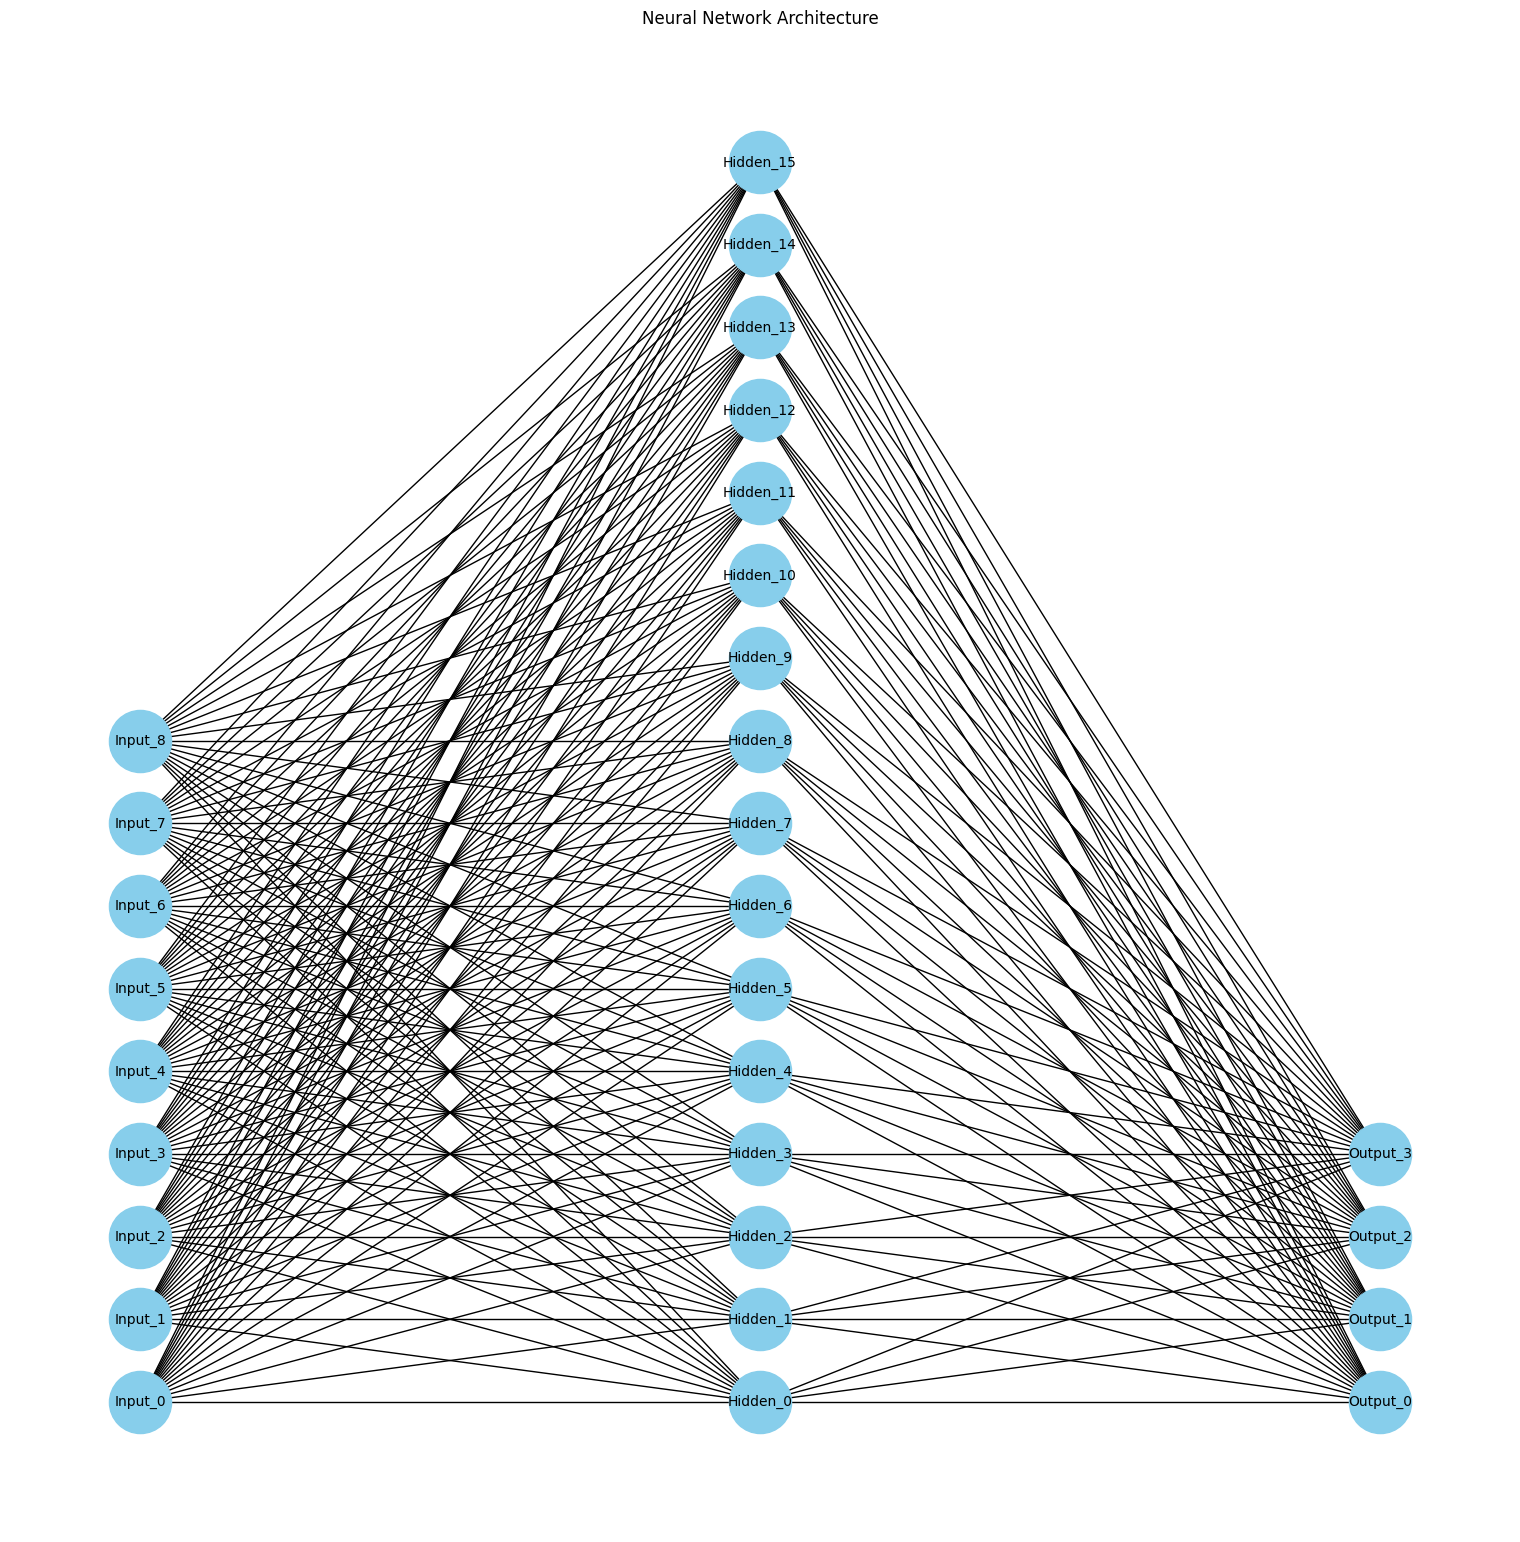

In [92]:
G = nx.Graph()

for i in range(9):
  G.add_node(f'Input_{i}', pos=(0, i))

for i in range(16):
  G.add_node(f'Hidden_{i}', pos=(1, i))

for i in range(4):
  G.add_node(f'Output_{i}', pos=(2, i))

for i in range(9):
  for j in range(16):
    G.add_edge(f'Input_{i}', f'Hidden_{j}')


for i in range(16):
  for j in range(4):
    G.add_edge(f'Hidden_{i}', f'Output_{j}')

plt.figure(figsize=(15,15))
pos = nx.get_node_attributes(G, 'pos')

nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', edge_color='black', linewidths=1, font_size=10, font_weight='normal')

plt.title('Neural Network Architecture')
plt.show()